In [93]:
import pandas as pd
%matplotlib inline
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm

In [2]:
!curl -O 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18171  100 18171    0     0  16341      0  0:00:01  0:00:01 --:--:-- 16355


In [11]:
file = 'house-votes-84.data'

In [49]:
f = pd.read_csv(file, header = None)

In [50]:
columns = ['party', '1', '2', '3', '4', '5', '6', '7', 
          '8', '9', '10', '11', '12', '13', '14', '15',
          '16']

In [51]:
f.columns = columns

# Challenge 1

In [52]:
f.replace('y', 1, inplace = True)

In [53]:
f.replace('n', 0, inplace = True)

In [54]:
f.head()

,party,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


In [55]:
for col in f.columns[f.columns != 'party']:
    f[col] = f[col].replace('?', np.mean(f[col][f[col] != '?']))

In [56]:
f.head()

,party,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


# Challenge 2

In [60]:
from sklearn.cross_validation import train_test_split
from patsy import dmatrices

In [64]:
y, X = np.ravel(f[['party']]), f.drop(['party'], axis=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

# Challenge 3

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [108]:
score = {}
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    score[i] = accuracy_score(y_test, neigh.predict(X_test))

In [109]:
score

{1: 0.9007633587786259,
 2: 0.89312977099236646,
 3: 0.9007633587786259,
 4: 0.9007633587786259,
 5: 0.91603053435114501,
 6: 0.93129770992366412,
 7: 0.91603053435114501,
 8: 0.92366412213740456,
 9: 0.93129770992366412,
 10: 0.93129770992366412,
 11: 0.92366412213740456,
 12: 0.92366412213740456,
 13: 0.92366412213740456,
 14: 0.92366412213740456,
 15: 0.92366412213740456,
 16: 0.92366412213740456,
 17: 0.92366412213740456,
 18: 0.91603053435114501,
 19: 0.91603053435114501,
 20: 0.91603053435114501}

A k value of 6, 9 or 10 gives the highest accuracy.  They are all tied for an accuracy of 93.13%.

# Challenge 4

In [85]:
from sklearn.linear_model import LogisticRegression

In [130]:
model = LogisticRegression()
model_log = model.fit(X_train, y_train)

In [131]:
score_logreg = model_log.score(X_test, y_test)

In [132]:
score_logreg

0.93893129770992367

The model has a 93.9% accuracy when tested on our test set.

# Challenge 5

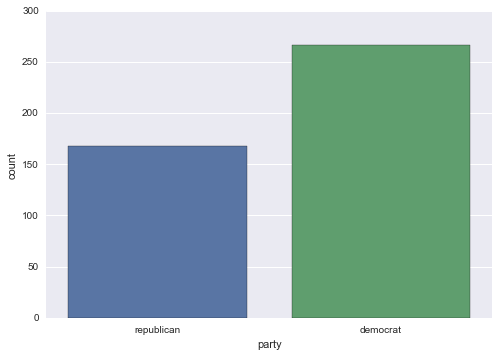

In [98]:
sns.countplot(x='party', data=f)

In [117]:
y_predicted = [np.array('democrat') for i in range(len(X))]
democrat_pred = accuracy_score(y, y_predicted)
print(democrat_pred)

0.613793103448


In [101]:
y_predicted = [np.array('republican') for i in range(len(X))]
republican_pred = accuracy_score(y, y_predicted)
print(republican_pred)

0.386206896552


# Challenge 6

In [102]:
import matplotlib.patches as mpatches

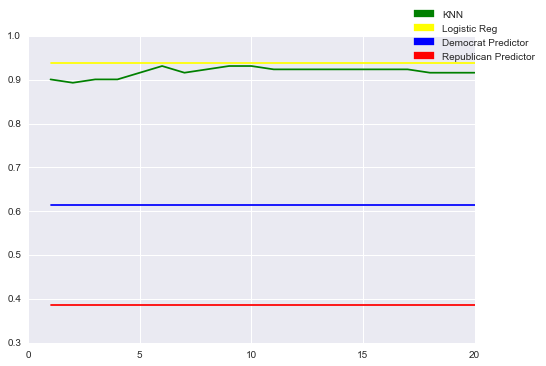

In [152]:
plt.plot(list(score.keys()), list(score.values()), 'green')
plt.plot(list(score.keys()), [score_logreg for i in range(1,21)], 'yellow')
plt.plot(list(score.keys()), [democrat_pred for i in range(1,21)], 'blue')
plt.plot(list(score.keys()), [republican_pred for i in range(1,21)], 'red')


green = mpatches.Patch(color='green', label='KNN')
yellow = mpatches.Patch(color='yellow', label='Logistic Reg')
blue = mpatches.Patch(color='blue', label='Democrat Predictor')
red = mpatches.Patch(color='red', label='Republican Predictor')
plt.legend(handles=[green, yellow, blue, red], bbox_to_anchor=(1, 1), loc = 10, borderaxespad=0.)
#plt.axes(xlabel = "K", ylabel = "% accuracy")



# Challenge 7

In [129]:
from sklearn.learning_curve import learning_curve

In [164]:
log_learn = learning_curve(model_log, X, y)

train_cv_err = np.mean(log_learn[1], axis=1)
test_cv_err = np.mean(log_learn[2], axis=1)

In [165]:
log_learn

(array([ 29,  94, 159, 224, 290]),
 array([[ 1.        ,  0.96551724,  0.96551724],
        [ 0.9893617 ,  0.9787234 ,  0.9787234 ],
        [ 0.98113208,  0.97484277,  0.97484277],
        [ 0.98214286,  0.97321429,  0.98214286],
        [ 0.96896552,  0.96551724,  0.97241379]]),
 array([[ 0.97241379,  0.89655172,  0.88965517],
        [ 0.97241379,  0.91724138,  0.89655172],
        [ 0.97241379,  0.93103448,  0.91724138],
        [ 0.97241379,  0.95172414,  0.93103448],
        [ 0.97931034,  0.96551724,  0.93793103]]))

In [140]:
m = log_learn[0]

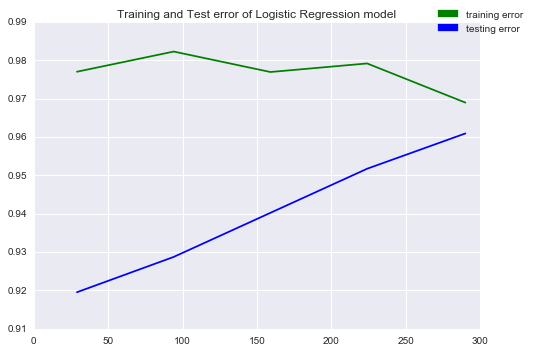

In [155]:
plt.plot(m, train_cv_err, 'green')
plt.plot(m, test_cv_err, 'blue')
green = mpatches.Patch(color='green', label='training error')
blue = mpatches.Patch(color='blue', label='testing error')
plt.legend(handles=[green, blue], bbox_to_anchor=(1, 1), loc = 10, borderaxespad=0.)
plt.title('Training and Test error of Logistic Regression model')

In [188]:
neigh = KNeighborsClassifier(n_neighbors=6)
knn_model = neigh.fit(X_train, y_train)
score = accuracy_score(y_test, neigh.predict(X_test))

In [157]:
knn_learn = learning_curve(neigh, X, y)

train_cv_err = np.mean(knn_learn[1], axis=1)
test_cv_err = np.mean(knn_learn[2], axis=1)

In [159]:
m = knn_learn[0]

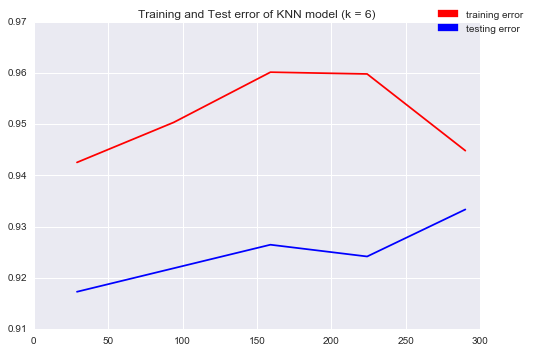

In [163]:
plt.plot(m, train_cv_err, 'red')
plt.plot(m, test_cv_err, 'blue')
red = mpatches.Patch(color='red', label='training error')
blue = mpatches.Patch(color='blue', label='testing error')
plt.legend(handles=[red, blue], bbox_to_anchor=(1, 1), loc = 10, borderaxespad=0.)
plt.title('Training and Test error of KNN model (k = 6)')

# Challenge 8

In [168]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [176]:
gauss_model = GaussianNB()
gauss_result = gauss_model.fit(X_train,y_train)
gauss_score = gauss_result.score(X_test, y_test)
print(gauss_score)

0.93893129771


In [177]:
svc_model = SVC()
svc_result = svc_model.fit(X_train,y_train)
svc_score = svc_result.score(X_test, y_test)
print(svc_score)

0.954198473282


In [182]:
dtc_model = DecisionTreeClassifier()
dtc_result = dtc_model.fit(X_train, y_train)
dtc_score = dtc_result.score(X_test, y_test)
print(dtc_score)

0.93893129771


In [184]:
rfc_model = RandomForestClassifier()
rfc_result = rfc_model.fit(X_train, y_train)
rfc_score = rfc_result.score(X_test, y_test)
print(rfc_score)

0.946564885496


# Challenge 9

In [185]:
from sklearn.cross_validation import cross_val_score

In [200]:
log_cross_score = cross_val_score(model_log, X_train, y_train)
mean_log_cross_score = np.mean(log_cross_score)
print(mean_log_cross_score)

0.967190836731


In [201]:
knn_cross_score = cross_val_score(knn_model, X_train, y_train)
mean_knn_cross_score = np.mean(knn_cross_score)
print(mean_knn_cross_score)

0.931048987252


In [202]:
svc_cross_score = cross_val_score(svc_model, X_train, y_train)
mean_svc_cross_score = np.mean(svc_cross_score)
print(mean_svc_cross_score)

0.963922862875


In [206]:
gauss_cross_score = cross_val_score(gauss_model, X_train, y_train)
mean_gauss_cross_score = np.mean(gauss_cross_score)
print(mean_gauss_cross_score)

0.927748657219


In [207]:
dtc_cross_score = cross_val_score(dtc_model, X_train, y_train)
mean_dtc_cross_score = np.mean(dtc_cross_score)
print(mean_dtc_cross_score)

0.950689186566


In [208]:
rfc_cross_score = cross_val_score(rfc_model, X_train, y_train)
mean_rfc_cross_score = np.mean(rfc_cross_score)
print(mean_rfc_cross_score)

0.953989516599


# challenge 10

In [245]:
f2 = pd.read_csv(file, header = None)

In [246]:
f2.columns = columns

In [247]:
f2.replace('y', 1, inplace = True)
f2.replace('n', 0, inplace = True)

In [259]:
from statistics import mode
for col in f2.columns:
    f2[col] = f2[col].replace('?', mode(f2[col]))


In [260]:
y2, X2 = np.ravel(f2[['1']]), f2.drop(['1', 'party'], axis = 1)

In [263]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=4444)

In [265]:
model_log = LogisticRegression()
model_log.fit(X2_train, y2_train)

cvs_log = cross_val_score(model_log, X2_train, y2_train)
np.mean(cvs_log)

0.7367825017795897

Using logistic regression, we can predict how a person will vote based on their other votes with 73.67% accuracy. 

# Challenge 11

In [269]:
movies = pd.read_csv('~/ds/nyc16_ds8/challenges/challenges_data/2013_movies.csv')

In [302]:
movies = movies.dropna()
movies.head(1)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00


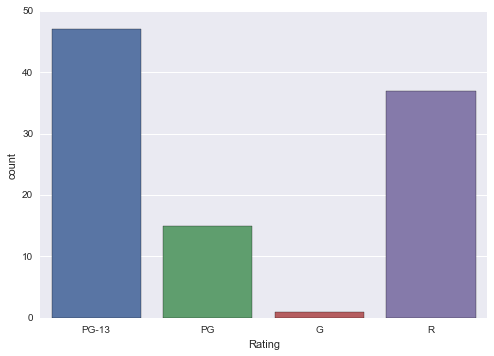

In [274]:
sns.countplot(x='Rating', data=movies)

In [303]:
y, X = np.ravel(movies[['Rating']]), movies.drop(['Rating', 'Title', 'Director', "ReleaseDate"], axis=1)

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [305]:
score = {}
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    score[i] = accuracy_score(y_test, neigh.predict(X_test))

In [306]:
score

{1: 0.48148148148148145,
 2: 0.44444444444444442,
 3: 0.48148148148148145,
 4: 0.55555555555555558,
 5: 0.55555555555555558,
 6: 0.51851851851851849,
 7: 0.51851851851851849,
 8: 0.51851851851851849,
 9: 0.48148148148148145,
 10: 0.48148148148148145,
 11: 0.51851851851851849,
 12: 0.44444444444444442,
 13: 0.44444444444444442,
 14: 0.48148148148148145,
 15: 0.44444444444444442,
 16: 0.48148148148148145,
 17: 0.44444444444444442,
 18: 0.44444444444444442,
 19: 0.44444444444444442,
 20: 0.44444444444444442}

In [307]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)
score = accuracy_score(y_test, neigh.predict(X_test))

In [308]:
score

0.55555555555555558

In [311]:
model = LogisticRegression()
model_log = model.fit(X_train, y_train)
score_log = model_log.score(X_test, y_test)

In [312]:
score_log

0.44444444444444442

In [314]:
y_predicted = [np.array('PG-13') for i in range(len(X))]
pg13_pred = accuracy_score(y, y_predicted)
print(pg13_pred)

0.459770114943


In [315]:
y_predicted = [np.array('R') for i in range(len(X))]
r_pred = accuracy_score(y, y_predicted)
print(r_pred)

0.379310344828


In [316]:
y_predicted = [np.array('PG') for i in range(len(X))]
pg_pred = accuracy_score(y, y_predicted)
print(pg_pred)

0.16091954023


In [317]:
y_predicted = [np.array('G') for i in range(len(X))]
g_pred = accuracy_score(y, y_predicted)
print(g_pred)

0.0


The KNN model with k = 5 performed the best (55% prediction).  However, the "stupid predictor" for PG-13 rating is 45%, so KNN was not significantly better. 

In [322]:
model_log.coef_

array([[ -1.46124379e-08,  -1.93897623e-09,  -1.75965536e-13],
       [  1.49848414e-08,  -6.42667083e-09,  -9.13751595e-14],
       [ -2.30763200e-08,   5.12598612e-09,   1.16458130e-13]])

In [323]:
model_log.classes_

array(['PG', 'PG-13', 'R'], dtype=object)

The three rows of array represent the dummy variables.  This can be interpreted in a few ways:   
-Budget decreases the chance of all ratings.  
-Domestic gross increase the chance of a PG rating, and decreases the chances of PG-13 and R ratings.  
-Runtime decreaes the chance of it being a PG move, and increases the chance of it being PG-13 or R.

# Challenge 12

In [332]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3103  100  3103    0     0   6273      0 --:--:-- --:--:-- --:--:--  6281


In [333]:
bc = pd.read_csv('data.csv', header = None)

In [339]:
bc.columns = ['age','year','nodes','status']

In [340]:
bc.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [355]:
print(bc.age.mean())
print(bc.age.std())

52.45751633986928
10.80345234930328


In [354]:
print(bc[bc.status == 1].age.mean())
print(bc[bc.status == 1].age.std())

52.01777777777778
11.012154179929546


In [353]:
print(bc[bc.status == 2].age.mean())
print(bc[bc.status == 2].age.std())

53.67901234567901
10.16713720829741


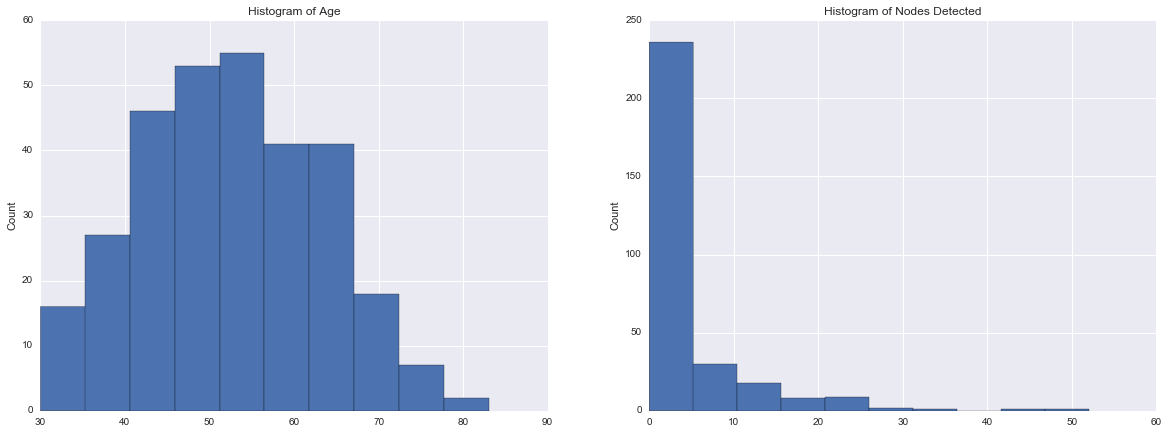

In [363]:
f, ax = plt.subplots(1,2,figsize=(20,7));
ax[0].hist(bc.age);
ax[0].set_title('Histogram of Age')
ax[0].set_ylabel('Count')

ax[1].hist(bc.nodes);
ax[1].set_title('Histogram of Nodes Detected')
ax[1].set_ylabel('Count')


In [364]:
print(bc.year.min())

58


In [365]:
print(bc.year.max())

69


In [368]:
y, X = np.ravel(bc[['status']]), bc.drop(['status'], axis=1)

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 4444)

In [373]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
score_logreg = model_log.score(X_test, y_test)
print(score_logreg)

0.815217391304


In [375]:
model_log.coef_

array([[ 0.0155515 , -0.02899279,  0.07136197]])

Based on these results, it appears that age decreases  risk of survival, year of surgery increases survival and nodes decreases risk of survival.

In [377]:
log_learning = learning_curve(model_log, X, y)

train_cv_err = np.mean(log_learning[1], axis=1)
test_cv_err = np.mean(log_learning[2], axis=1)

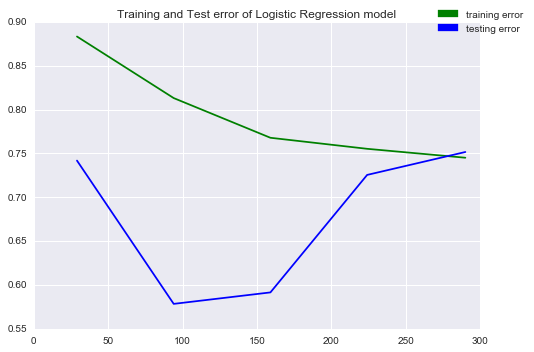

In [378]:
plt.plot(m, train_cv_err, 'green')
plt.plot(m, test_cv_err, 'blue')
green = mpatches.Patch(color='green', label='training error')
blue = mpatches.Patch(color='blue', label='testing error')
plt.legend(handles=[green, blue], bbox_to_anchor=(1, 1), loc = 10, borderaxespad=0.)
plt.title('Training and Test error of Logistic Regression model')